# Panorama Image Stitching
In this assignment, you will generate a stitched panorama image from multiple input images.

## Submission Details
Assignment deadline: Midnight, Tuesday 7th March \
Jupyter Notebook containing submission to be submitted via blackboard \
Total grade: 10% of final module mark 

# Submission details:
#### Name: Shubham Kumar Manglam
#### ID: 20230220
#### Class code: 1MAI1

In [13]:
# Load required Libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

## Read in the images

Note that there will be multiple image sets to try in this assignment. For full marks, you will need to report the results of your solution on each of the sets of images

In [14]:
# read images
path = 'images'
input_path = path + '/set_1/'
filenames = [input_path + filename for filename in os.listdir(input_path)]
raw_images = [cv2.imread(filename) for filename in filenames]
count = len(raw_images)

## Reorder the images
As this assignment will require the merge of multiple images, we need to do some alignment of the images. THe idea is to reset the order of the images, and to make the centre image the "source" image, and to then extend the panorama to both sides. \

As this is not the key learning from this assignment, the code is provided, no modifications are required

In [15]:
# reset the order of the images to make the center one is the source image, and extend to both sides
images = []
new_idx = (count - 1) // 2
k = -1
for i in range(count):
    new_idx = new_idx + k * i
    images.append(raw_images[new_idx])
    k *= -1

# initialize the source image
img_src = images[0]

## Perform panorama stitching

In this section, implement the panorama image stitching. Note that there are multiple approaches that will work to achieve this, and you can find multiple examples online. In this assignment, we will work through one possible implementation. 

Note that in this example, the goal is to merge multiple images (many demos online only merge two images). Also, for this example, we will consider horizontal merges only. It is relatively straight forward to extend this implementation to consider vertical panorama stitching too.

Note: with this implementation, the quality varies with the number of input images (merging 2 images is ok, but for more than 2, the perspective isn't very good). So try varying the number of images used in the merge

In [16]:
# the image need to stitch
def pan(images, img_src):
    for i in range(1, len(images)):
        img_dst = images[i]
        # make sure to merge from left to right
        if i % 2 == 0:
            img_src, img_dst = img_dst, img_src

        # detects keypoints and computes the descriptors for "source" and "destination" images (hint: use ORB features)
        
        # using ORB features
        orb =cv2.ORB_create()
        
        #creating Keypoints and descriptors
        kp1, des1 = orb.detectAndCompute(img_src,None)
        kp2, des2 = orb.detectAndCompute(img_dst,None)
        

        # create a brute foce matching function, and calculate the matches
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        matches = bf.match(des1, des2)
        
        # sort the matches by distance
        matches = sorted(matches, key = lambda x:x.distance)
         
        # Keep only the top 50 matches
        # clubbing it with cv2.drawMatches to draw matches on the images 
        img3 = cv2.drawMatches(img_src,kp1,img_dst,kp2,matches[:50],None, matchColor=(0,0,255), flags= cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        
        # Get the keypoints from the matches
        src_pts = np.zeros((len(matches), 2), dtype=np.float32).reshape(-1, 1, 2)
        dst_pts = np.zeros((len(matches), 2), dtype=np.float32).reshape(-1, 1, 2)
        for i, match in enumerate(matches):
            src_pts[i, :] = kp1[match.queryIdx].pt
            dst_pts[i, :] = kp2[match.trainIdx].pt
        
    
        # Compute the homography matrix using RANSAC
        M, mask = cv2.findHomography( dst_pts, src_pts,cv2.RANSAC,5.0)
          
        # show the keypoint matches (hint: use the opencv drawMatches function)
        # plotting the images with matches
        # show matched points image
        plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
        plt.show()
      
        # get the height and width of the original images
        h1, w1, p1 = img_src.shape
        h2, w2, p2 = img_dst.shape
        h = np.maximum(h1, h2)
        w = np.maximum(w1, w2)
        
        # actual width of the final image
        move_dis = int(np.maximum(dst_pts[0][0][0], src_pts[0][0][0]))
        
        # apply perspective correction (hint: use opencv warpPerspective. Set the width and height to (w1 + w2 - move_dis, h))
        # using wrapPrespective and adjusting the diemensions
        finalimage = cv2.warpPerspective(img_dst, M, (w1 + w2 - move_dis, h))
        plt.imshow(cv2.cvtColor(finalimage, cv2.COLOR_BGR2RGB)),plt.show()
        
        
        # combine the source image to the transformed image
        # describing image size
        copy = finalimage.copy()
        copy[0:img_src.shape[0], 0:img_src.shape[1]] = img_src
        
        r_crop = w+move_dis
        copy = copy[:,:r_crop]
        img_transform = copy
        
        # use img_transform as the source image for the next iteration of the loop
        img_src = img_transform
    
    return img_src

#citation: https://github.com/davidmasek/image_stitching/blob/master/panorama.ipynb

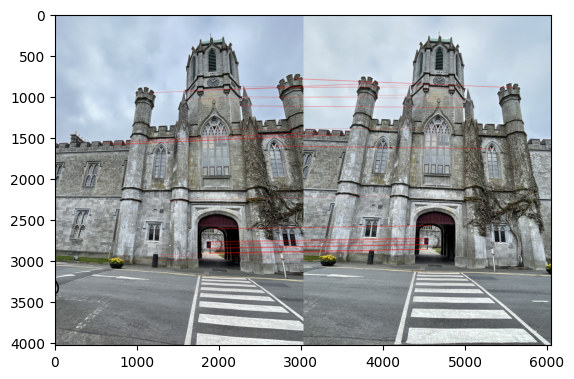

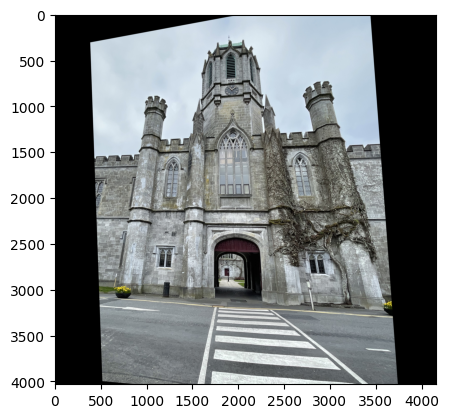

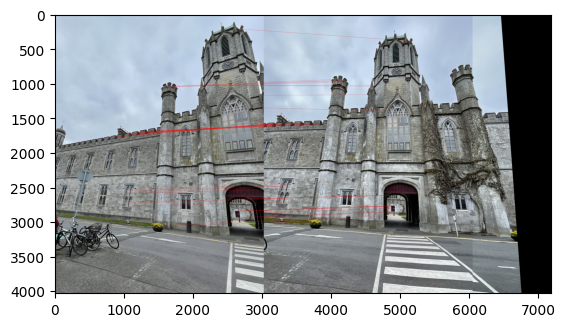

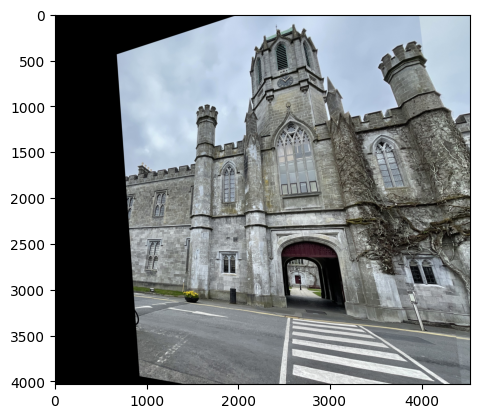

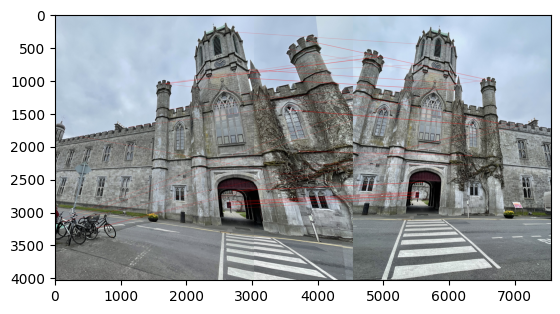

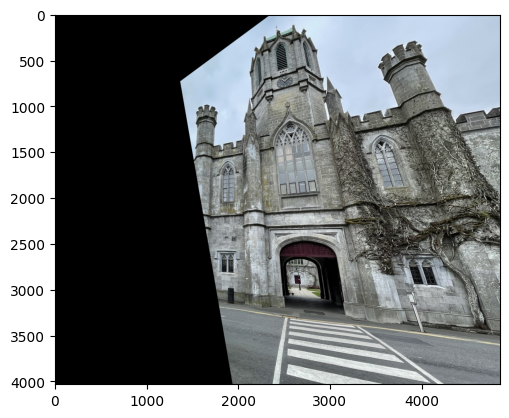

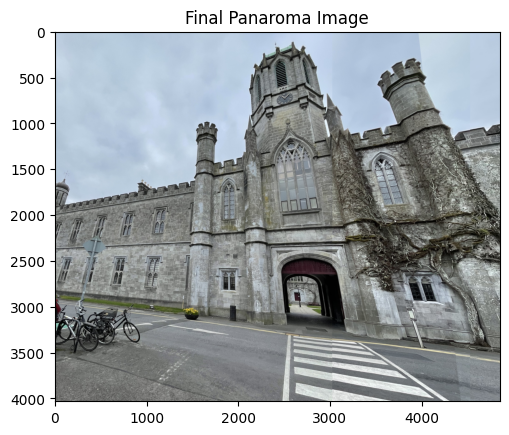

In [17]:
# Display final panorama
#plt.imshow(img_transform),plt.show()
img =pan(images, img_src)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Final Panaroma Image")
plt.show()

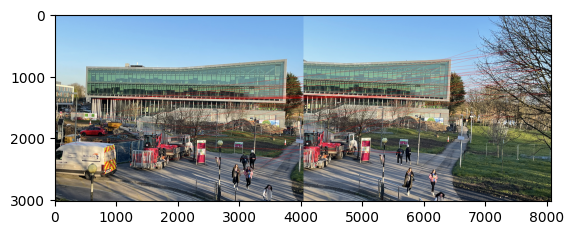

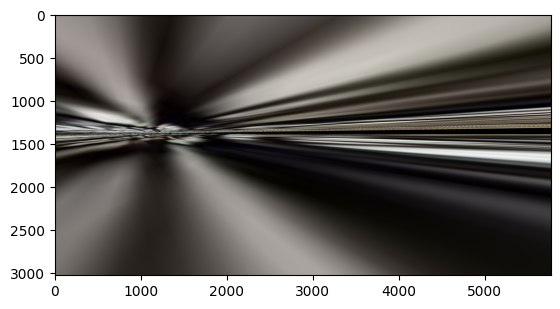

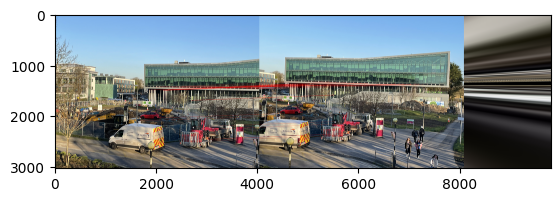

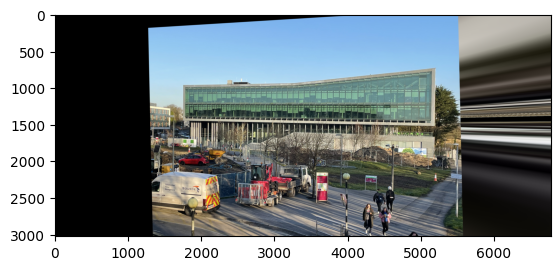

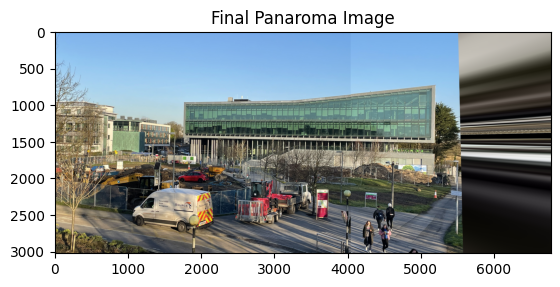

In [22]:
# read images
path = 'images'
input_path = path + '/set_2/'
filenames = [input_path + filename for filename in os.listdir(input_path)]
raw_images = [cv2.imread(filename) for filename in filenames]
count = len(raw_images)

# reset the order of the images to make the center one is the source image, and extend to both sides
images = []
new_idx = (count - 1) // 2
k = -1
for i in range(count):
    new_idx = new_idx + k * i
    images.append(raw_images[new_idx])
    k *= -1

# initialize the source image
img_src = images[0]

img =pan(images, img_src)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Final Panaroma Image")
plt.show()



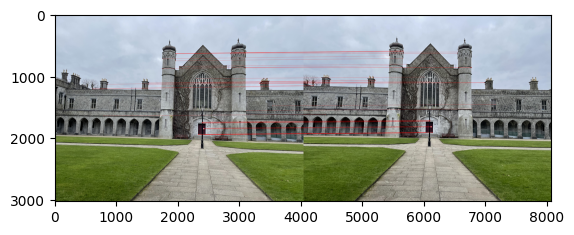

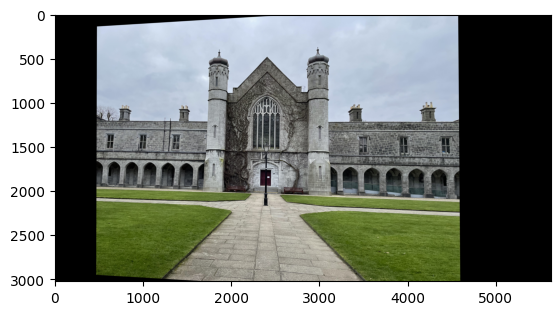

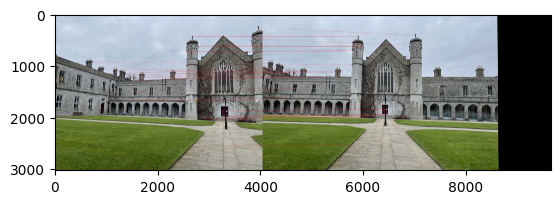

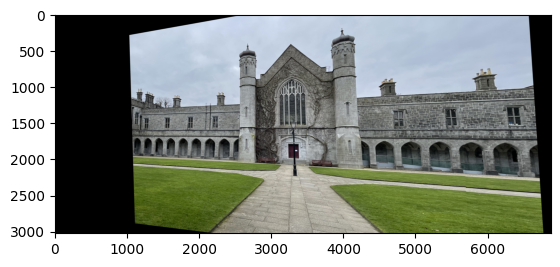

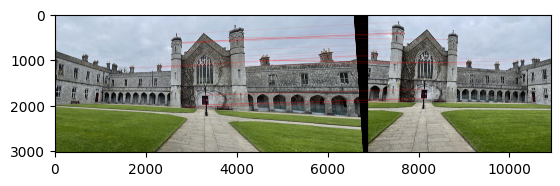

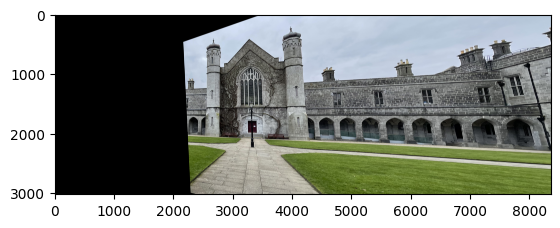

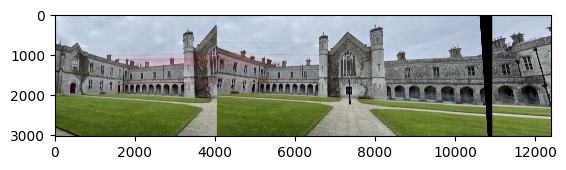

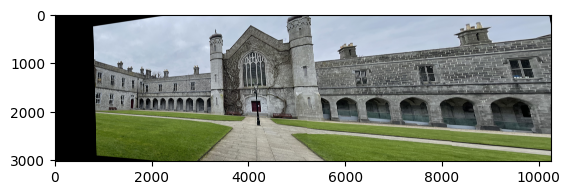

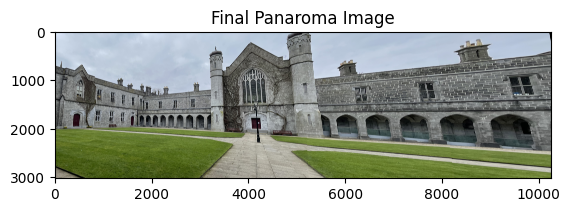

In [19]:
# read images
path = 'images'
input_path = path + '/set_3/'
filenames = [input_path + filename for filename in os.listdir(input_path)]
raw_images = [cv2.imread(filename) for filename in filenames]
count = len(raw_images)

# reset the order of the images to make the center one is the source image, and extend to both sides
images = []
new_idx = (count - 1) // 2
k = -1
for i in range(count):
    new_idx = new_idx + k * i
    images.append(raw_images[new_idx])
    k *= -1

# initialize the source image
img_src = images[0]

img =pan(images, img_src)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Final Panaroma Image")
plt.show()

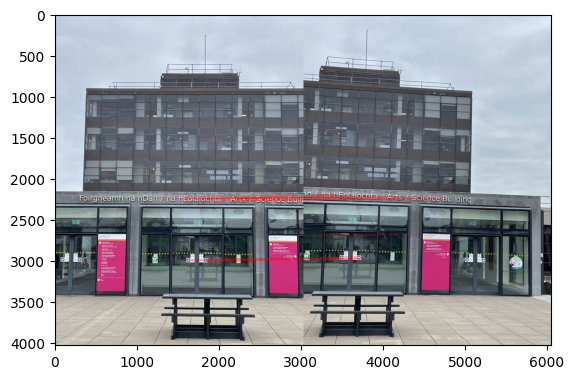

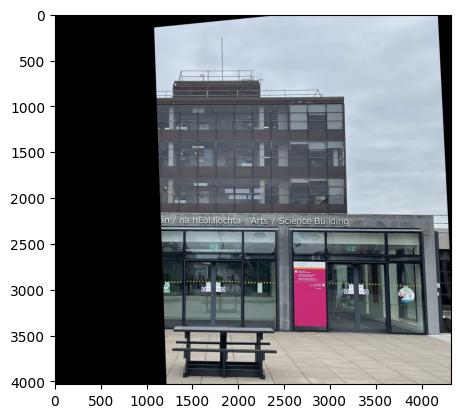

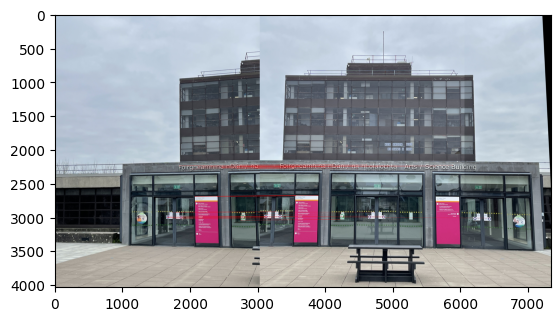

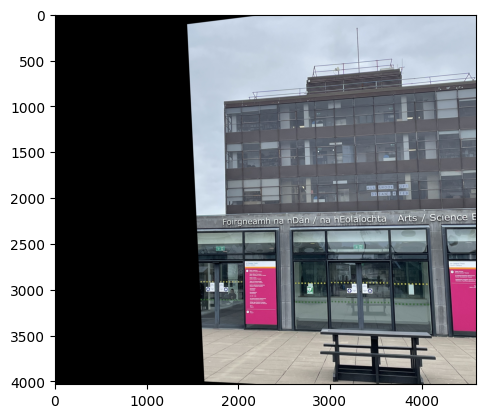

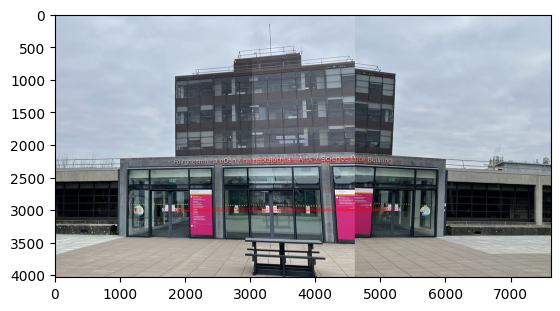

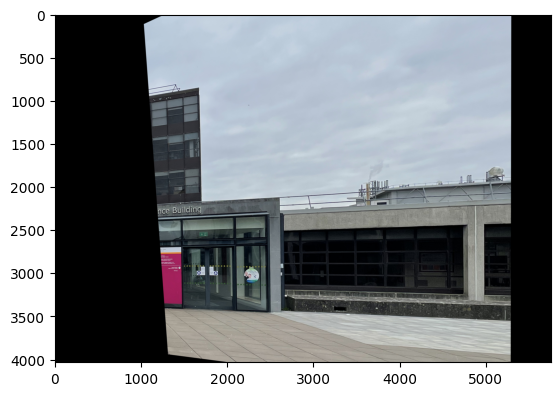

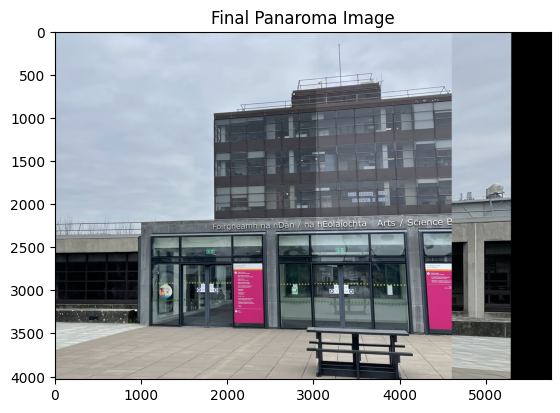

In [20]:
# read images
path = 'images'
input_path = path + '/set_4/'
filenames = [input_path + filename for filename in os.listdir(input_path)]
raw_images = [cv2.imread(filename) for filename in filenames]
count = len(raw_images)

# reset the order of the images to make the center one is the source image, and extend to both sides
images = []
new_idx = (count - 1) // 2
k = -1
for i in range(count):
    new_idx = new_idx + k * i
    images.append(raw_images[new_idx])
    k *= -1

# initialize the source image
img_src = images[0]

img =pan(images, img_src)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Final Panaroma Image")
plt.show()

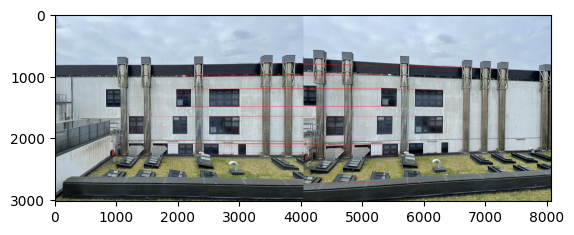

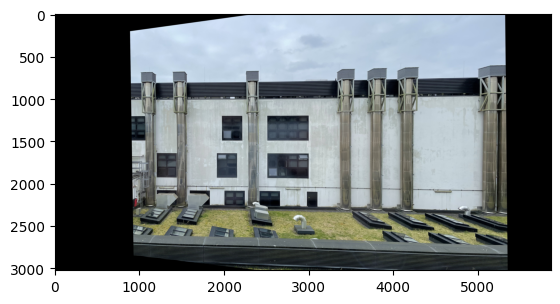

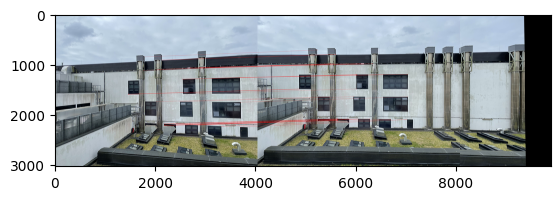

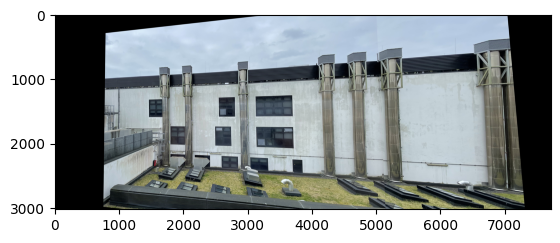

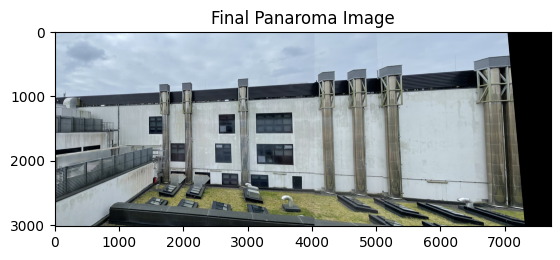

In [23]:
# read images
path = 'images'
input_path = path + '/set_5/'
filenames = [input_path + filename for filename in os.listdir(input_path)]
raw_images = [cv2.imread(filename) for filename in filenames]
count = len(raw_images)

# reset the order of the images to make the center one is the source image, and extend to both sides
images = []
new_idx = (count - 1) // 2
k = -1
for i in range(count):
    new_idx = new_idx + k * i
    images.append(raw_images[new_idx])
    k *= -1

# initialize the source image
img_src = images[0]

img =pan(images, img_src)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Final Panaroma Image")
plt.show()

store = img

## Summary of findings
At this stage, you should have tried your implementation on all of the image sets provided.\
You should have noticed by now that:
- One of the sets does not give a good result (and a lot of artifacts with the "out of the box" solution
- In some cases, even when there is a relatively good stitch, the final panorama perspective isn't very good
- A black boarder is visible in the image
- There are some mismatches in image brightness
- there are sharp transitions between merged images

For all of the points above, suggest 
- A reason for the issue
- A potential fix for the issue


*One of the sets does not give a good result (and a lot of artifacts with the "out of the box" solution*

Reason: This happened in set 4 in my case . I suspect the reason to be the Camera movement wasn't horizontal while shifting from one image to the next. Due to vertical camera movement there might be diffculty in calculating homography matrix, which caused images not to stich properly and we can see inconsitency in the final image. This is called Misaligned Images. It can be due to differene in scaling, angle , spacial positions and capturing devices.

Solution: To correct  Misaligned we can use stable movements like Tripod or calculate the overlap between the images more robustly.

*In some cases, even when there is a relatively good stitch, the final panorama perspective isn't very good*

Reason:This can be due to fish eye distortion. This can come into play espcially after using wide angle lens as we can see in set 3. The points closer to the camera looks streched , than the points farther away.

Solution: To correct this we can undistort the image we can use cv2.fisheye.undistorteImage() after camera calibration before using the imges for paranoma stiching.

*A black boarder is visible in the image*

Reason: This might happen due to roation of the imgages which leaves empty spaces in the merged images. Images are rotated to match the other images for stiching. It might also happen due to masking. Since we are using masking algorithm here and if masks are not properly aligned it can lead to black borders in the final panorama.

Solution: We can check the alignment of masked or rotation algorithm to make sure they ae propely aligned to prevent black borders, or we can also crop the final image in a rectangle which does not include the black border.

*There are some mismatches in image brightness*

Reason: This can happen because of differences in lighting conditions or exposure settings or different devices used to shoot images.

Solution: There are various methods available in opencv to fix this, one such possible method would be to use histogram equalisation or adaptive histogram equalisation available in opencv.

*there are sharp transitions between merged images*

Reason:There can be sharp trasitions between merged images because of differences in lighting conditions and other settings such as saturation and exposure settings between adjacent images.

Solution: We can apply post - processing techniques such as blending or smoothening to reduce the effect of sharp transitions. We can use multi band blendings such as cv2.pyrBlend() for this.

## Extra credit

For a 2 mark extra credit assignment, implement a fix for __One__ of the following:
- A solution to correct the perspective in when more than 2 images are merged
- Remove the black pixels and crop the minimum "complete" area from the panorama (with an intelligent solution, not a manual hack!!!)
- Smooth the transitions between merges and minimize the brightness differences

I have tried to remove black pixels and crop the minimum complete area from the panorama. 
I am first converting the images to grayscale.
Then I am calculating the threshold for binay images between 3 and 255.
Finding Contours and then max contours for finding maximum area for black edges.
Getting the cordinates for boundinf rectangles.
Cropping the image ourt with the indices.
Plotting the final image.

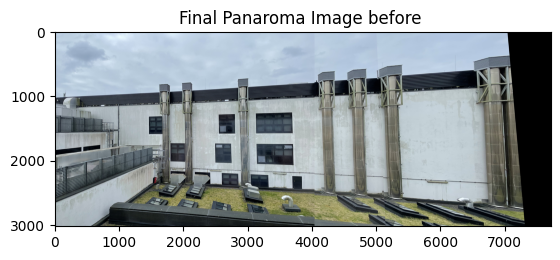

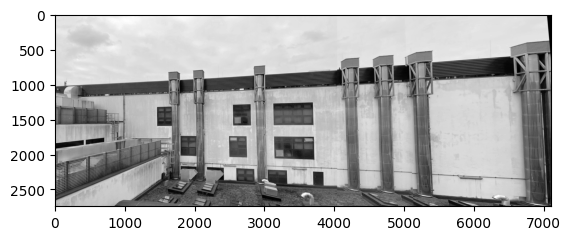

In [63]:
import copy

plt.imshow(cv2.cvtColor(store, cv2.COLOR_BGR2RGB))
plt.title("Final Panaroma Image before ")
plt.show()

# Read the image, convert it into grayscale, and make in binary image for threshold value of 1.
#convering it into grayscale 
gray_img = cv2.cvtColor(store, cv2.COLOR_BGR2GRAY)


"""Trying for color images"""
# Split the color channels
#b, g, r = cv2.split(store)
# Apply a binary threshold to each channel
#thresh_b = cv2.threshold(b, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
#thresh_g = cv2.threshold(g, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
#thresh_r = cv2.threshold(r, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# Merge the thresholded channels
#thresh = cv2.merge((thresh_b, thresh_g, thresh_r))

#calculating threshold for grayscale between 0 and 255
threshold = cv2.threshold(gray_img, 3, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Finding contours from the image
contours,_ = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour
max_contour = max(contours, key=cv2.contourArea)

# Compute the bounding rectangle
x, y, w, h = cv2.boundingRect(max_contour)

# Crop the image
cropped_img = img[y:y+h, x:x+w]

#backtorgb = cv2.cvtColor(cropped_img,cv2.COLOR_GRAY2RGB)

plt.imshow(cropped_img, cmap= 'gray')
plt.show()